In [61]:
import pandas as pd
import numpy as np
from matplotlib import pyplot

In [91]:
train_data_og = pd.read_csv('./train.csv')
test_data_og = pd.read_csv('./test.csv')
print(train_data_og.shape, test_data_og.shape)
# print(train_data_og.isnull().sum())
# print(test_data_og.isnull().sum())
print(train_data_og.dtypes)
train_data_og.sample(n=10).style

(8693, 14) (4277, 13)
PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
2529,2717_01,Earth,False,G/431/S,TRAPPIST-1e,18.000000,False,130.000000,0.000000,13.000000,191.000000,554.000000,Francy Mayder,False
1409,1490_01,Europa,False,D/47/P,55 Cancri e,26.000000,False,0.000000,304.000000,0.000000,3998.000000,nan,Caphird Crioncery,False
1347,1424_02,Europa,False,B/47/P,55 Cancri e,29.000000,False,2988.000000,2147.000000,0.000000,0.000000,1779.000000,Goros Sageng,False
6919,7337_01,Europa,False,A/89/S,TRAPPIST-1e,25.000000,False,0.000000,115.000000,0.000000,1823.000000,4041.000000,Ranons Folkshbox,False
7948,8487_01,Europa,nan,C/282/P,55 Cancri e,32.000000,True,65.000000,nan,0.000000,88.000000,9811.000000,Kajamak Boderbint,False
2728,2928_01,Europa,False,B/92/P,55 Cancri e,54.000000,True,0.000000,2062.000000,2.000000,19.000000,1618.000000,Menkibi Mander,False
8532,9110_01,Earth,False,F/1866/P,TRAPPIST-1e,47.000000,False,0.000000,0.000000,16.000000,3.000000,854.000000,Ronne Armstromez,False
7138,7609_02,Europa,True,A/83/P,TRAPPIST-1e,39.000000,False,0.000000,0.000000,0.000000,0.000000,0.000000,Sabiton Reeddommy,True
5278,5631_01,Earth,False,F/1166/P,TRAPPIST-1e,20.000000,False,47.000000,0.000000,0.000000,0.000000,2711.000000,Bel Boltond,False
1494,1585_01,Earth,True,G/252/P,TRAPPIST-1e,18.000000,False,0.000000,0.000000,0.000000,0.000000,0.000000,Salley Crosarios,True


# EDA

In [38]:
display(train_data_og.describe(include='all').style)
# print(train_data_og['HomePlanet'].values)
print(f"Transported mean: {train_data_og['Transported'].mean()}")


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
count,8693,8492,8476,8494,8511,8514.000000,8490,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000,8493,8693
unique,8693,3,2,6560,3,nan,2,nan,nan,nan,nan,nan,8473,2
top,0001_01,Earth,False,G/734/S,TRAPPIST-1e,nan,False,nan,nan,nan,nan,nan,Gollux Reedall,True
freq,1,4602,5439,8,5915,nan,8291,nan,nan,nan,nan,nan,2,4378
mean,nan,nan,nan,nan,nan,28.827930,nan,224.687617,458.077203,173.729169,311.138778,304.854791,nan,nan
std,nan,nan,nan,nan,nan,14.489021,nan,666.717663,1611.489240,604.696458,1136.705535,1145.717189,nan,nan
min,nan,nan,nan,nan,nan,0.000000,nan,0.000000,0.000000,0.000000,0.000000,0.000000,nan,nan
25%,nan,nan,nan,nan,nan,19.000000,nan,0.000000,0.000000,0.000000,0.000000,0.000000,nan,nan
50%,nan,nan,nan,nan,nan,27.000000,nan,0.000000,0.000000,0.000000,0.000000,0.000000,nan,nan
75%,nan,nan,nan,nan,nan,38.000000,nan,47.000000,76.000000,27.000000,59.000000,46.000000,nan,nan


Transported mean: 0.5036236051995858


## Checking correlations

In [40]:
display(train_data_og.corr().style)

C:\Users\Dell\AppData\Local\Temp\ipykernel_5224\3671959298.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  display(train_data_og.corr().style)


,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
Age,1.000000,0.068723,0.130421,0.033133,0.123970,0.101007,-0.075026
RoomService,0.068723,1.000000,-0.015889,0.054480,0.010080,-0.019581,-0.244611
FoodCourt,0.130421,-0.015889,1.000000,-0.014228,0.221891,0.227995,0.046566
ShoppingMall,0.033133,0.054480,-0.014228,1.000000,0.013879,-0.007322,0.010141
Spa,0.123970,0.010080,0.221891,0.013879,1.000000,0.153821,-0.221131
VRDeck,0.101007,-0.019581,0.227995,-0.007322,0.153821,1.000000,-0.207075
Transported,-0.075026,-0.244611,0.046566,0.010141,-0.221131,-0.207075,1.000000


Age has bad correlation with Transported. Others are no good either.   
Maybe making Age bands and clubbing all the prices together might reveal something.

array([<AxesSubplot: title={'center': 'False'}>,
       <AxesSubplot: title={'center': 'True'}>], dtype=object)

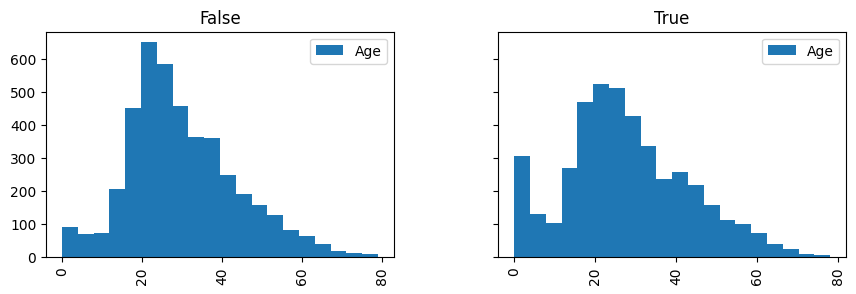

In [89]:
train_data_og.hist(column= ["Age"],by='Transported', bins =20, figsize=(10,3), legend=True, sharey=True) 
# train_data_og.hist(column= ["Age"], bins = 20)

maybe create Age bins: [0,12],[13,40],[41,80] 

In [48]:
print(train_data_og[['HomePlanet','Transported']].groupby(['HomePlanet'])['Transported'].mean())
print(train_data_og[['CryoSleep','Transported']].groupby(['CryoSleep'])['Transported'].mean())
print(train_data_og[['Destination','Transported']].groupby(['Destination'])['Transported'].mean())
print(train_data_og[['VIP','Transported']].groupby(['VIP'])['Transported'].mean())

HomePlanet
Earth     0.423946
Europa    0.658846
Mars      0.523024
Name: Transported, dtype: float64
CryoSleep
False    0.328921
True     0.817583
Name: Transported, dtype: float64
Destination
55 Cancri e      0.610000
PSO J318.5-22    0.503769
TRAPPIST-1e      0.471175
Name: Transported, dtype: float64
VIP
False    0.506332
True     0.381910
Name: Transported, dtype: float64


CryoSleep and VIP have good correlation to Transported